<a href="https://colab.research.google.com/github/kinaykds/projek-dikdas/blob/main/PROJECT_IDXPARTNERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
# Load Dataset
df = pd.read_csv("/content/loan_data_2007_2014.csv")


# **LANGKAH 1 DATA UNDERSTANDING**

In [ ]:
# Data Understanding
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())  # Mengecek jumlah nilai yang hilang per kolom



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19699 entries, 0 to 19698
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19699 non-null  int64  
 1   id                           19699 non-null  int64  
 2   member_id                    19699 non-null  int64  
 3   loan_amnt                    19699 non-null  int64  
 4   funded_amnt                  19699 non-null  int64  
 5   funded_amnt_inv              19699 non-null  float64
 6   term                         19699 non-null  object 
 7   int_rate                     19699 non-null  float64
 8   installment                  19699 non-null  float64
 9   grade                        19699 non-null  object 
 10  sub_grade                    19699 non-null  object 
 11  emp_title                    18399 non-null  object 
 12  emp_length                   19012 non-null  object 
 13  h

# **DATA PREPARATION**

In [ ]:
#data preparation
# Menghapus kolom dengan terlalu banyak missing values (lebih dari 50%)
thresh = len(df) * 0.5
df = df.dropna(thresh=thresh, axis=1)
print("\nRemaining Columns After Dropping High Missing Values:", df.columns)


Remaining Columns After Dropping High Missing Values: Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq'],
      dtype='object')


In [ ]:
# Menghapus kolom yang tidak relevan
irrelevant_columns = ["id", "member_id", "url", "desc", "title", "zip_code"]
df = df.drop(columns=irrelevant_columns, errors='ignore')
print("\nRemaining Columns After Dropping Irrelevant Columns:", df.columns)


Remaining Columns After Dropping Irrelevant Columns: Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq'],
      dtype='object')


In [ ]:
# Mengisi nilai yang hilang dengan median untuk kolom numerik
num_imputer = SimpleImputer(strategy='median')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
print("\nMissing Values After Imputation (Numeric):")
print(df.isnull().sum())


Missing Values After Imputation (Numeric):
Unnamed: 0                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     1300
emp_length                     687
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc  

In [ ]:
# Mengisi nilai yang hilang dengan modus untuk kolom kategorikal
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
print("\nMissing Values After Imputation (Categorical):")
print(df.isnull().sum())


Missing Values After Imputation (Categorical):
Unnamed: 0                    0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp               

In [ ]:
# Encoding data kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"\nLabel Encoded Column: {col}")
    print(df[col].head())


Label Encoded Column: term
0    0
1    1
2    0
3    0
4    1
Name: term, dtype: int64

Label Encoded Column: grade
0    1
1    2
2    2
3    2
4    1
Name: grade, dtype: int64

Label Encoded Column: sub_grade
0     6
1    13
2    14
3    10
4     9
Name: sub_grade, dtype: int64

Label Encoded Column: emp_title
0    12251
1    10011
2    12251
3      178
4    12556
Name: emp_title, dtype: int64

Label Encoded Column: emp_length
0     1
1    10
2     1
3     1
4     0
Name: emp_length, dtype: int64

Label Encoded Column: home_ownership
0    3
1    3
2    3
3    3
4    3
Name: home_ownership, dtype: int64

Label Encoded Column: verification_status
0    2
1    1
2    0
3    1
4    1
Name: verification_status, dtype: int64

Label Encoded Column: issue_d
0    2
1    2
2    2
3    2
4    2
Name: issue_d, dtype: int64

Label Encoded Column: loan_status
0    3
1    0
2    3
3    3
4    1
Name: loan_status, dtype: int64

Label Encoded Column: pymnt_plan
0    0
1    0
2    0
3    0
4    0
Name:

## **LANGKAH 2 (EXPLORATY DATA ANALYSIS EDA)**

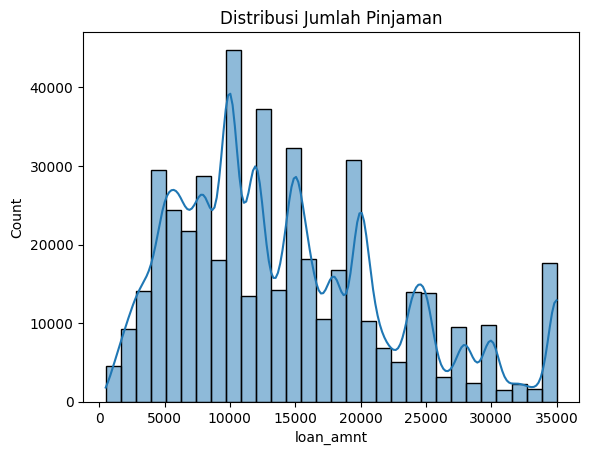

In [ ]:
# Exploratory Data Analysis (EDA)
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Pinjaman")
plt.show()

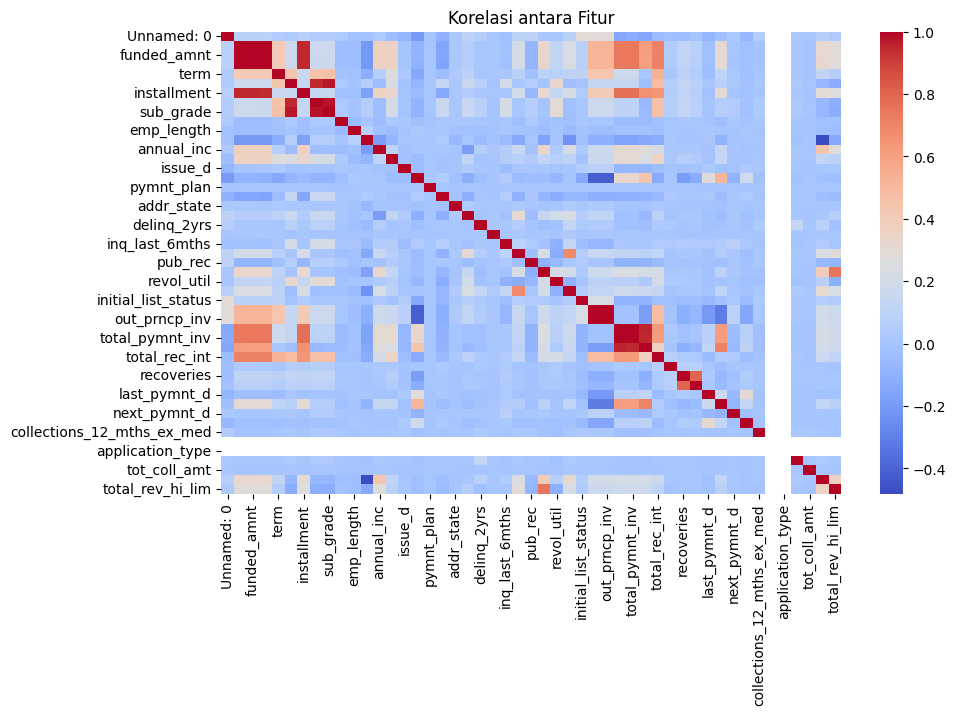

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Korelasi antara Fitur")
plt.show()

In [ ]:
# Split dataset
X = df.drop(columns=['loan_status'])  # Fitur
y = df['loan_status']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape, "Testing set size:", X_test.shape)



Training set size: (15759, 44) Testing set size: (3940, 44)


In [ ]:
# Normalisasi fitur numerik
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
print("\nFirst 5 Rows of Normalized Training Data:")
print(X_train.head())



First 5 Rows of Normalized Training Data:
       Unnamed: 0  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
19568    1.701508  -1.131594    -1.145138        -1.146524     1 -1.119177   
15792    1.040110  -0.025411     0.001339         0.021272     0 -0.418803   
3214    -1.163031  -0.265885    -0.247895        -0.232597     0  1.691879   
12311    0.430384  -0.265885    -0.247895        -0.296064     0 -1.518366   
8877    -0.171110  -1.107547    -1.120215        -1.121137     0 -0.323189   

       installment  grade  sub_grade  emp_title  ...  total_rec_late_fee  \
19568    -1.295807      0          4       9279  ...           -0.172348   
15792     0.222513      1          6       2163  ...           -0.172348   
3214      0.123251      4         22       2036  ...           -0.172348   
12311    -0.169810      0          1       7531  ...           -0.172348   
8877     -1.105506      1          7       1540  ...           -0.172348   

       recoveries  collection_r

# **DATA MODELING DAN EVALUASI**

In [ ]:
# Model Training & Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    # Add the multi_class parameter for roc_auc_score
    print("ROC AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr'))
    print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Model: Logistic Regression
Accuracy: 0.7626903553299492
ROC AUC: 0.5702873119453226
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       558
           1       0.00      0.00      0.00       366
           2       0.00      0.00      0.00         1
           3       0.76      1.00      0.87      3005
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6

    accuracy                           0.76      3940
   macro avg       0.11      0.14      0.12      3940
weighted avg       0.58      0.76      0.66      3940


Model: Random Forest
Accuracy: 0.9926395939086294
ROC AUC: 0.9450643273972213
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       558
           1       0.98      1.00      0.99       366
           2       0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


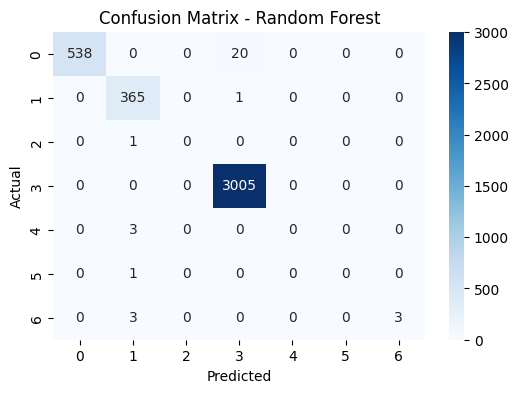

In [ ]:
# Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix #Removed the indentation from here
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {name}")
plt.show()


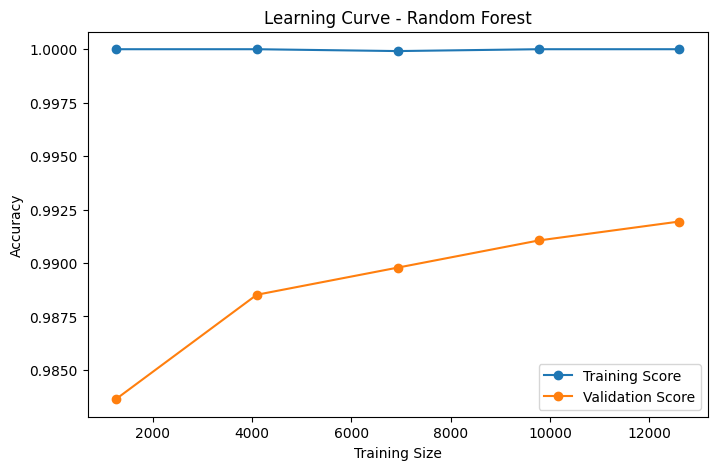

In [ ]:
# Learning Curve
from sklearn.model_selection import learning_curve # Import the learning_curve function
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Score", marker='o')
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title(f"Learning Curve - {name}")
plt.legend()
plt.show()